# Apprentissage Automatique : BE 2 

## Premier apprentissage

In [1]:
import numpy as np
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
def forwardPass(X, W, b):
    I = X.dot(W)+b
    O = 1/(1+np.exp(-I))
    return (O)

In [3]:
def backwardPass(X, Y, e, W, b, lr):
    new_W = W + (lr*Y*(1-Y)*e) * X.T
    new_b = b + (lr*Y*(1-Y)*e)
    new_e = e*W
    return new_W, new_b, new_e

In [4]:
def printLoss(ii,lLoss,gt,guess):
    if not ii%250:
        lLoss.append(np.square(gt -guess).sum() / 2)
    return lLoss

In [5]:
def sigmoidDiff(Y):
    return Y*(1-Y)

In [6]:
def declareLayer(w,h):
    W = 2 * np.random.random((w,h)) - 1
    b = np.zeros((1, h))
    return W,b

In [7]:
def updateLayer(delta,I,W,b,lr,bFirstLayer):
    new_W = W + lr * I.T.dot(delta)
    b+= lr * delta.sum(axis=0)
    if not bFirstLayer:
        I = lr * delta.dot(W.T)
    return new_W,b,I

In [8]:
def backProgHiddenLayer(sup_delta,sup_W,O):
    error=sup_delta.dot(sup_W.T)
    delta=error*sigmoidDiff(O1)
    return error,delta

In [9]:
def backProgLastLayer(Y,Y_pred):
    error=Y-Y_pred
    delta=error*sigmoidDiff(Y_pred)
    return error,delta

In [10]:
def showLearning(lLoss):
    plt.figure()
    plt.plot(lLoss)
    plt.grid(True)
    plt.show()

In [11]:
np.random.seed(1) # pour que l'exécution soit déterministe

# N est le nombre de données d'entrée
# D_in est la dimension des données d'entrée
# D_h le nombre de neurones de la couche cachée
# D_out est la dimension de sortie (nombre de neurones de la couche de sortie

N, D_in, D_h, D_out = 30, 2, 10, 3
lr = 0.01 # learning rate

In [12]:
np.random.seed(1)
lLoss=[]

X = np.random.random((N, D_in))
Y = np.random.random((N, D_out))


'''Initialisation aléatoire des poids du réseau'''
W1,b1=declareLayer(D_in,D_h)
W2,b2=declareLayer(D_h,D_out)

''' Learning '''

for ii in tqdm(range(100000),desc='Learning...'):
    pass
    '''Forward '''
    O1 = forwardPass(X,W1,b1)
    O2 = forwardPass(O1,W2,b2)
    Y_pred = O2
    
    lLoss=printLoss(ii,lLoss,Y,Y_pred)

    ''' Backprog ''' 
    l2_error,l2_delta=backProgLastLayer(Y,Y_pred)
    l1_error,l1_delta=backProgHiddenLayer(l2_delta,W2,O1)

    W2,b2,O1=updateLayer(l2_delta,O1,W2,b2,lr,bFirstLayer=False)
    W1,b1,X=updateLayer(l1_delta,X,W1,b1,lr,bFirstLayer=True)
    
print('Done !')

print("Results : ")

Learning...: 100%|██████████| 100000/100000 [00:06<00:00, 14865.27it/s]

Done !
Results : 


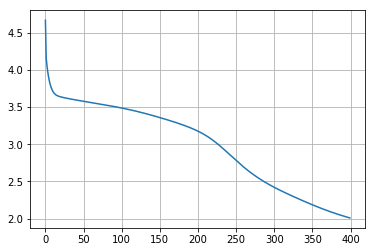

In [13]:
showLearning(lLoss)

## MNIST



### Loading data

In [14]:
from mnist import MNIST
mdata = MNIST('MNIST-data')
DataApp, LabelApp = mdata.load_training()
DataTest, LabelTest = mdata.load_testing()

In [15]:
DataApp=np.asarray(DataApp)
LabelApp=np.asarray(LabelApp)
DataTest=np.asarray(DataTest)
LabelTest=np.asarray(LabelTest)

In [16]:
DataApp.shape

(60000, 784)

In [17]:
def decoupage_donnees(dataApp,labelApp,ratio):
    nr=int(ratio*dataApp.shape[0])
    l=list(range(dataApp.shape[0]))
    np.random.shuffle(l)

    dataLearning=np.asarray([dataApp[l[ii]] for ii in range(nr)])
    labelLearning=np.asarray([labelApp[l[ii]] for ii in range(nr)])
    dataEval=np.asarray([dataApp[l[ii+nr]] for ii in range(dataApp.shape[0]-nr)])
    labelEval=np.asarray([labelApp[l[ii+nr]] for ii in range(dataApp.shape[0]-nr)])
    return dataLearning,labelLearning,dataEval,labelEval

In [18]:
dataLearning,labelLearning,dataEval,labelEval=decoupage_donnees(DataApp,
                                                                LabelApp,
                                                                0.99)

In [19]:
dataEval.shape[0]

600

### Launching learning

In [24]:
# N est le nombre de données d'entrée
# D_in est la dimension des données d'entrée
# D_h le nombre de neurones de la couche cachée
# D_out est la dimension de sortie (nombre de neurones de la couche de sortie

N=dataEval.shape[0]
D_in=dataEval.shape[1]
D_h=100
D_out=10
lr = 0.001

In [21]:
def makeGT(x):
    z=np.zeros(10)
    z[x]=1
    return z

labelEval2=np.asarray(list(map(lambda x : makeGT(x) ,labelEval.tolist())))

In [22]:
def backProgLastLayer(Y,Y_pred):
    error=Y-Y_pred
    delta=error*sigmoidDiff(Y_pred)
    return error,delta

In [50]:
def calcLoss(rawGT,guess):
    return np.square(rawGT -guess).sum() / 2

In [70]:
def calcSuccess(gt,guess):
    test= gt==list(map(lambda x :np.argmax(x),guess))
    rightGuesses=len(list(filter(lambda x: x,test)))/len(gt)
    return rightGuesses

In [71]:
np.random.seed(1)
lLearningLoss=[]
lLearningSuccess=[]
lEvalLoss=[]
lEvalSuccess=[]
lTestLoss=[]
lTestSuccess=[]

'''Initialisation aléatoire des poids du réseau'''
W1,b1=declareLayer(D_in,D_h)
W2,b2=declareLayer(D_h,D_out)

''' Learning '''

for ii in tqdm(range(5000)):
    
    '''Forward '''
    O1 = forwardPass(dataEval,W1,b1)
    O2 = forwardPass(O1,W2,b2)
    Y_pred = O2
    
#     lLoss,lSuccess=printLossMNIST(ii,lLoss,labelEval,Y_pred1,lSuccess,labelEval2)
    
    if not ii % 250 :
        lLearningLoss.append(calcLoss(labelEval2,Y_pred))
        lLearningSuccess.append(calcSuccess(labelEval,Y_pred))
        
    ''' Backprog ''' 
    l2_error,l2_delta=backProgLastLayer(labelEval2,Y_pred)
    l1_error,l1_delta=backProgHiddenLayer(l2_delta,W2,O1)

    W2,b2,O1=updateLayer(l2_delta,O1,W2,b2,lr,bFirstLayer=False)
    W1,b1,dataEval=updateLayer(l1_delta,dataEval,W1,b1,lr,bFirstLayer=True)

    
''' Apply learning '''

  0%|          | 0/5000 [00:00<?, ?it/s]/home/apopov/Documents/Programmes/3jupy/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
100%|██████████| 5000/5000 [00:59<00:00, 83.39it/s]


' Apply learning '

Text(0,0.5,'Success ratio')

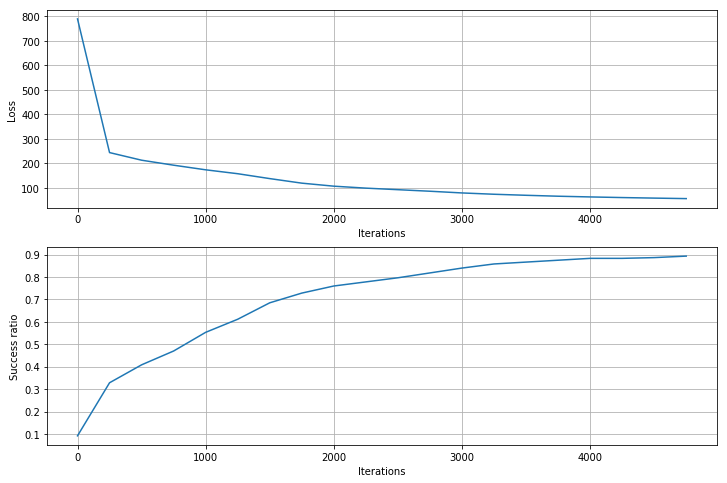

In [73]:
absisse=[ 250 * ii for ii in range(len(lLearningLoss))]

plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(absisse,lLearningLoss,)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(212)
plt.grid(True)
plt.plot(absisse,lLearningSuccess)
plt.xlabel('Iterations')
plt.ylabel('Success ratio')

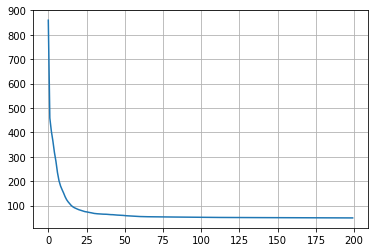

In [53]:
showLearning(lLoss)

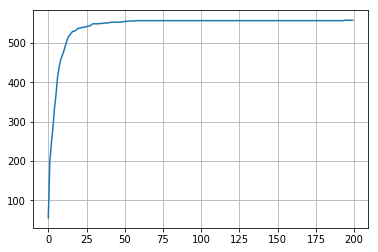

In [54]:
showLearning(lSuccess)

In [33]:
lSuccessRate=list(map(lambda x : x / 600,lSuccess))

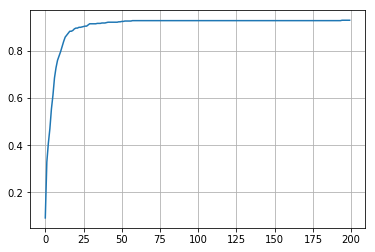

In [35]:
showLearning(lSuccessRate)

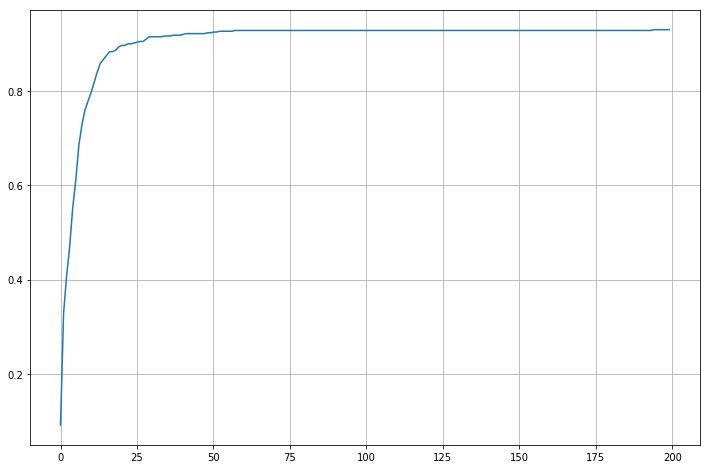

In [37]:
plt.figure(figsize=(12,8))
plt.plot(lSuccessRate)
plt.grid(True)
plt.show()

In [ ]:
''' Apply learning '''

In [44]:
dTest=DataTest[0:600]
lTest=LabelTest[0:600]

In [45]:
O1 = forwardPass(dTest,W1,b1)
O2 = forwardPass(O1,W2,b2)
Y_pred = O2

/home/apopov/Documents/Programmes/3jupy/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
test= lTest==list(map(lambda x :np.argmax(x),Y_pred))
rightGuesses=len(list(filter(lambda x: x,test)))

In [47]:
rightGuesses

387